# OBSERVED READMISSION FOR ICU

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pyarrow.feather as feather
import os

In [2]:
ROOT_FOLDER = os.path.dirname(os.getcwd())
PROCESSED_DATA = os.path.join(ROOT_FOLDER , "data", "processed")

In [3]:
ICU_STAYS = os.path.join(PROCESSED_DATA,"icustays_20240512.feather")
df1 = feather.read_feather(ICU_STAYS)
#df1 = df1[['icu_stay_id','icu_los','subject_id']]
df1['icu_stay_id'] = df1['icu_stay_id'].astype(int)
df1.head()


,subject_id,hadm_id,icu_stay_id,first_careunit,icu_intime,icu_outtime,icu_los,hours_until_readmission,will_be_readmitted,hours_to_readmission,stay_is_readmission
0,10018328,23786647,31269608,Neuro Stepdown,2154-04-24 23:03:44,2154-05-02 15:55:21,7.702512,NaN,False,NaN,False
1,10020187,24104168,37509585,Neuro Surgical Intensive Care Unit (Neuro SICU),2169-01-15 04:56:00,2169-01-20 15:47:50,5.452662,NaN,False,NaN,False
2,10020187,26842957,32554129,Neuro Intermediate,2170-02-24 18:18:46,2170-02-25 15:15:26,0.872685,NaN,False,NaN,False
3,10012853,27882036,31338022,Trauma SICU (TSICU),2176-11-26 02:34:49,2176-11-29 20:58:54,3.766725,NaN,False,NaN,False
4,10020740,25826145,32145159,Trauma SICU (TSICU),2150-06-03 20:12:32,2150-06-04 21:05:58,1.037106,NaN,False,NaN,False


In [4]:
df1['icu_intime'] = pd.to_datetime(df1['icu_intime'])
df1['icu_outtime'] = pd.to_datetime(df1['icu_outtime'])

In [5]:
df1 = df1.sort_values(by=['subject_id', 'icu_intime'])
df1['next_admission_time'] = df1.groupby('subject_id')['icu_intime'].shift(-1)

df1['days_between'] = (df1['next_admission_time'] - df1['icu_outtime']).dt.total_seconds() / (24 * 3600)

In [6]:
# Find unique patient IDs in the ICU stays data
unique_patients = df1['icu_stay_id'].nunique()
print(f"Number of unique patients admitted to the ICU: {unique_patients}")

readmitted_within_30_days = df1[df1['days_between'] <= 30]['subject_id'].nunique()
readmitted_within_2_days = df1[df1['days_between'] <= 2]['subject_id'].nunique()

print(f"Number of unique patients readmitted to the ICU: {readmitted_within_30_days}")
print(f"Number of unique patients readmitted to the ICU: {readmitted_within_2_days}")

Number of unique patients admitted to the ICU: 133
Number of unique patients readmitted to the ICU: 13
Number of unique patients readmitted to the ICU: 6


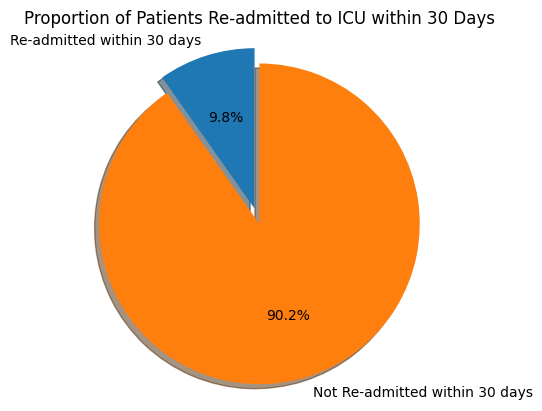

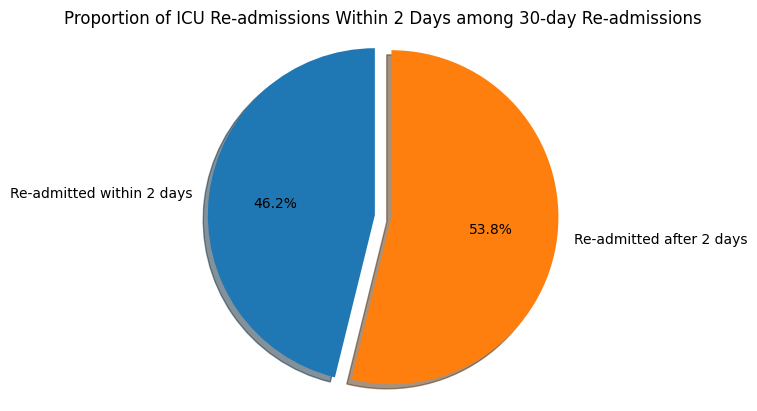

In [7]:
import matplotlib.pyplot as plt

# Data for plotting
labels = 'Re-admitted within 30 days', 'Not Re-admitted within 30 days'
sizes = [13, 120]  # Total patients = 133, Re-admitted within 30 days = 13
explode = (0.1, 0)  # only "explode" the 1st slice

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Proportion of Patients Re-admitted to ICU within 30 Days')

# Data for the second plot
labels_inner = 'Re-admitted within 2 days', 'Re-admitted after 2 days'
sizes_inner = [6, 7]  # From the 13 who were re-admitted within 30 days, 6 were within 2 days
explode_inner = (0.1, 0)  # only "explode" the 1st slice of the inner circle

# Second pie chart
fig2, ax2 = plt.subplots()
ax2.pie(sizes_inner, explode=explode_inner, labels=labels_inner, autopct='%1.1f%%', shadow=True, startangle=90)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Proportion of ICU Re-admissions Within 2 Days among 30-day Re-admissions')

plt.show()
